Dataset Shape: (43824, 13)

First 5 Rows:
    No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    438

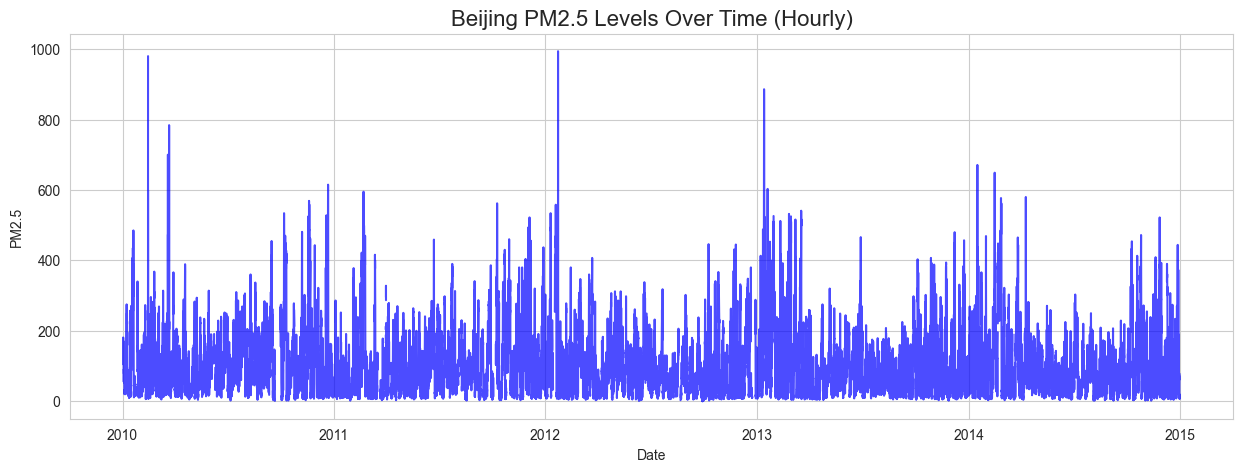

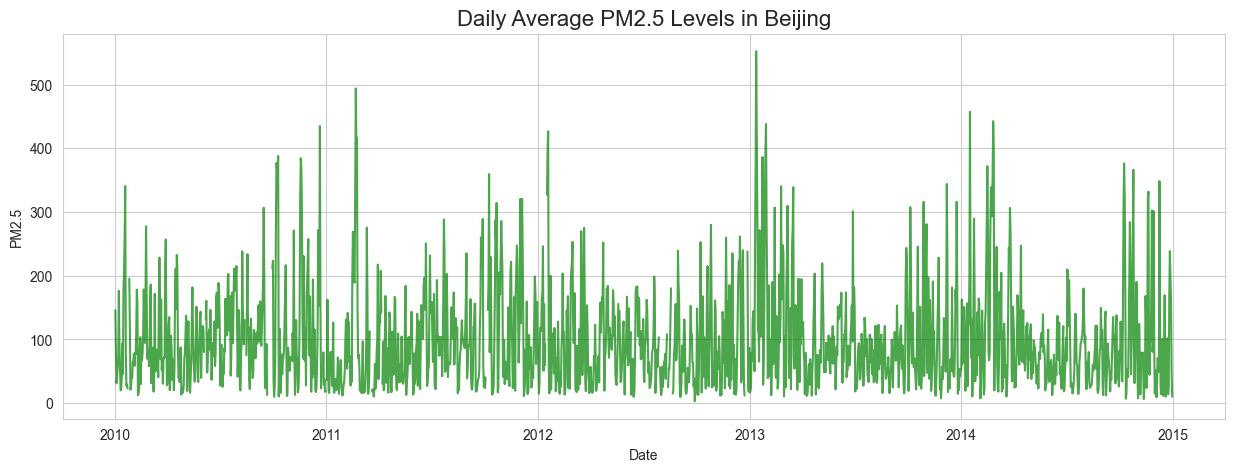

Processed daily data saved at 'data/processed/pm25_daily.csv'


In [16]:
# ===============================
# AirPulse: Step 1 – Data Loading & Initial Exploration
# ===============================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

# Step 2: Load the Dataset
# Adjust path according to your notebook location
data_path = '../data/raw/Beijing_PM25.csv'
df = pd.read_csv(data_path)

# Step 3: Inspect the Dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nColumn Information:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# Step 4: Create datetime column from year, month, day, hour
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
df.set_index('datetime', inplace=True)

# Optional: drop unnecessary columns
df.drop(columns=['No','year','month','day','hour'], inplace=True)

# Step 5: Plot hourly PM2.5 levels
plt.figure(figsize=(15,5))
plt.plot(df['pm2.5'], color='blue', alpha=0.7)
plt.title("Beijing PM2.5 Levels Over Time (Hourly)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()

# Step 6: Aggregate to daily averages (numeric columns only)
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df_daily = df[numeric_cols].resample('D').mean()

# Plot daily PM2.5
plt.figure(figsize=(15,5))
plt.plot(df_daily['pm2.5'], color='green', alpha=0.7)
plt.title("Daily Average PM2.5 Levels in Beijing", fontsize=16)
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()

# Step 7: Save processed daily data
df_daily.to_csv('../data/processed/pm25_daily.csv')
print("Processed daily data saved at 'data/processed/pm25_daily.csv'")

